
# **Trabajo de fin de Máster: Categorización de miopías**

### **Anexo 1: Modelo físico-computacional basado en Le Grand para el cálculo del error refractivo.**

##### *Por Juan Carlos Velasco Sánchez, Rubén Casal Ferrero y Manuel García González*

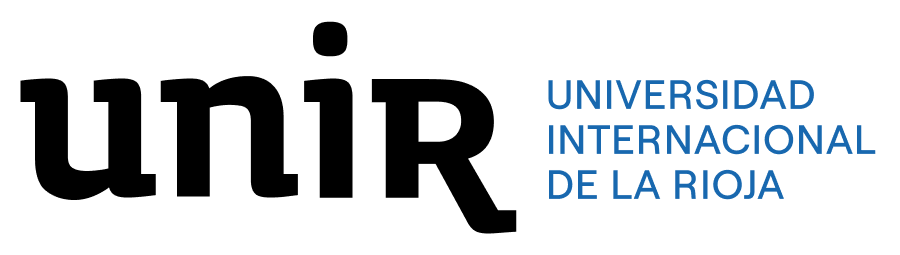


El primer anexo recoge el desarrollo completo del modelo físico-computacional implementado en Python, basado en el modelo esquemático de Le Grand. El objetivo de este código es simular el comportamiento óptico del ojo humano desde un enfoque físico, utilizando exclusivamente parámetros biométricos y constantes teóricas definidas por dicho modelo.

En primer lugar, se realiza una implementación matemática de la potencia del sistema óptico ocular mediante la fórmula para lentes gruesas compuestas por dos superficies esféricas. Esta modelización se estructura en torno a la potencia de la córnea y del cristalino, y se incluyen los términos de interacción entre ambas estructuras. Para ello, se han utilizado valores de referencia del modelo de Le Grand, como los radios de curvatura, espesores, índices de refracción y la posición de los planos principales del sistema óptico.

Una vez validado el modelo frente al comportamiento esperado del ojo emétrope teórico (con una potencia total cercana a 59,94 dioptrías), se aplica este mismo esquema sobre un grupo control de pacientes reales. A partir de las medidas biométricas disponibles para cada paciente, se estima su potencia dióptrica mediante el modelo físico, y se compara con las dioptrías medidas experimentalmente, evaluando así la capacidad predictiva del modelo en contextos clínicos reales.

Estas primeras líneas de código constituyen la base inicial del modelo físico-computacional de Le Grand. En ellas se definen los parámetros biométricos y ópticos fundamentales que caracterizan la geometría y propiedades del ojo teórico:

* R1 y R2 corresponden a los radios de curvatura anterior y posterior de la córnea, respectivamente.

* R3 y R4 representan los radios anterior y posterior del cristalino.

* e_cornea, camara_ant y e_lente son los espesores de la córnea, la cámara anterior y el cristalino.

* longitud_axial indica la distancia total desde la córnea hasta la retina.

* Finalmente, n_cornea, n_acuoso, n_cristalino y n_vitreo son los índices de refracción de cada medio ocular.

Junto con estos parámetros, se definen dos funciones auxiliares:

* potencia_superficie(n2, n1, R): Calcula la potencia óptica de una superficie esférica a partir del cambio de índice de refracción entre dos medios y su radio de curvatura.

* potencia_lente_correctora(P_ojo, P_deseada, d): Estima la potencia que debería tener una lente correctora (como unas gafas) situada a una distancia d del ojo, para compensar el error refractivo, dada la diferencia entre la potencia del ojo real (P_ojo) y la potencia necesaria para enfocar correctamente sobre la retina (P_deseada).

------------------------------------------------------

In [ ]:
parametros = {
    'R1': 0.0078,
    'R2': 0.0065,
    'R3': 0.0102,
    'R4': -0.0060,
    'e_cornea': 0.55e-3,
    'camara_ant': 3.6e-3,
    'e_lente': 4e-3,
    'longitud_axial': 0.024,
    'n_cornea': 1.3771,
    'n_acuoso': 1.3374,
    'n_cristalino': 1.42,
    'n_vitreo': 1.336
}

In [ ]:
def potencia_lente_correctora(P_ojo, P_deseada, d):
    return (P_ojo - P_deseada) / (1 - d * P_deseada)

In [ ]:
def potencia_superficie(n2, n1, R):
    return (n1 - n2) / R

------------------------------------------------------

Posteriormente, se ha implementado esta función, que calcula la potencia total del ojo teórico (ideal), usando únicamente los valores fijos del modelo de Le Grand, para validar que la implementación reproduce correctamente el comportamiento del ojo emétrope.

En concreto, la función calcula primero las potencias dióptricas individuales de las cuatro superficies refractivas principales del sistema ocular (dos en la córnea y dos en el cristalino), empleando para ello la fórmula de la potencia de una superficie esférica. Posteriormente se calcularon los términos de interacción óptica entre superficies (producto de potencias dividido por el índice y multiplicado por el espesor), de cara a estudiar la posibilidad de implementar un modelo basado en 4 superficies independientes, pero finalmente no ha sido posible definirlo.

Finalmente se implementa el modelo basado en 2 superficies según se especifica en la memmoria descriptiva.

------------------------------------------------------

In [ ]:
def potencia_total_ojo(param):
    #Potencias superficiales
    Pcornea_anterior = potencia_superficie(1.000, param['n_cornea'], param['R1'])
    Pcornea_posterior = potencia_superficie(param['n_cornea'], param['n_acuoso'], param['R2'])
    Pcristalino_anterior = potencia_superficie(param['n_acuoso'], param['n_cristalino'], param['R3'])
    Pcristalino_posterior = potencia_superficie (param['n_cristalino'], param['n_vitreo'], param['R4'])

    #Términos de interacción
    Tcornea                 = (param['e_cornea'] / param['n_cornea']) * Pcornea_anterior * Pcornea_posterior
    Tcornea_cristalino      = (param['camara_ant'] / param['n_acuoso']) * Pcornea_posterior * Pcristalino_anterior
    Tcristalino             = (param['e_lente'] / param['n_cristalino']) * Pcristalino_anterior * Pcristalino_posterior

    #Potencia total
    Pcornea = Pcornea_anterior + Pcornea_posterior - (param['e_cornea'] / param['n_cornea']) * Pcornea_anterior * Pcornea_posterior
    Pcristalino = Pcristalino_anterior + Pcristalino_posterior - (param['e_lente'] / param['n_cristalino']) * Pcristalino_anterior * Pcristalino_posterior
    P_total_2S = Pcornea + Pcristalino - ((6/ 100000 + 6.02 / 1000) / param['n_acuoso']) * Pcornea * Pcristalino


    hc = param['e_cornea'] * (param['n_cornea'] - 1) / Pcornea

    hl = param['e_lente'] * (param['n_cristalino'] - param['n_acuoso']) / Pcristalino
    dist1 = param['camara_ant'] - hc + hl
    print(dist1)
    print((6/ 100000) + (6.02 / 1000))


    return P_total_2S, Pcornea_anterior, Pcornea_posterior, Pcristalino_anterior, Pcristalino_posterior, Tcornea, Tcornea_cristalino, Tcristalino

In [ ]:
# # Cálculo de potencia total del ojo
# P_total_2S, P_total_4S, P1, P2, P3, P4, T12, T23, T34 = potencia_total_ojo(parametros)
# print(f"Potencia total del ojo (2superficies): {P_total_2S: 2f} D")
# print(f"Potencia total del ojo (4superficies): {P_total_4S:.2f} D")

# print(P1, P2, P3, P4, T12, T23, T34)

------------------------------------------------------

Este bloque de código se utiliza como una comprobación teórica  dentro del modelo para verificar que, utilizando los parámetros ópticos definidos por el modelo de Le Grand, la distancia entre el plano principal imagen del sistema (H') y la retina se corresponde con la que cabría esperar en un ojo emétrope, es decir, uno que no presenta error refractivo.

------------------------------------------------------

In [ ]:
distancia_lente_correctora = 0.0012

# Distancia del plano principal del sistema H' a la retina
d1 = parametros['longitud_axial'] - (1.91 / 1000)
print(d1)

# Distancia teórica del plano principal del sistema H' a la retina (se ajusta para que el error refractivo sea 0,
#puede que no sea el mismo resultado por un tema de decimales de la longitud axial o la distancia desde la córnea a H', que es 1.91mm)
d1 = 0.02229

# Cálculo del error refractivo y potencia de la lente correctora
# error_refractivo = s_imagen - d1
# print(f"Error refractivo (m): {error_refractivo:.6f}")

# Potencia deseada para enfocar en la retina
P_deseada = parametros['n_vitreo'] / d1
print(f"Potencia deseada del ojo para enfocar en retina: {P_deseada:.2f} D")

# Potencia de la lente correctora (d = distancia desde la lente a la retina)
d = distancia_lente_correctora  # en metros
# P_lente = potencia_lente_correctora(P_total_2S, P_deseada, d)
# print(f"Potencia de la lente correctora necesaria: {P_lente:.2f} D")

0.022090000000000002
Potencia deseada del ojo para enfocar en retina: 59.94 D


------------------------------------------------------

Esta función representa la implementación computacional final del modelo físico de Le Grand adaptado a datos individuales de pacientes. A diferencia del modelo teórico anterior, que utilizaba valores fijos, esta versión permite calcular la potencia dióptrica del ojo en función de parámetros específicos de cada paciente, como la longitud axial (AXL), el espesor del cristalino y la córnea, el radio anterior de la córnea y la profundidad de la cámara anterior (ACD).

------------------------------------------------------

In [ ]:
def calc(param, AXL, espesorCristalino, espesorCornea, radioAnteriorCornea, acd):
    radioPosteriorCornea = radioAnteriorCornea * 0.822

    #Potencias superficiales
    Pcornea_anterior = potencia_superficie(1.000, param['n_cornea'], radioAnteriorCornea)
    Pcornea_posterior = potencia_superficie(param['n_cornea'], param['n_acuoso'], radioPosteriorCornea)
    Pcristalino_anterior = potencia_superficie(param['n_acuoso'], param['n_cristalino'], param['R3'])
    Pcristalino_posterior = potencia_superficie (param['n_cristalino'], param['n_vitreo'], param['R4'])

    Pcornea = Pcornea_anterior + Pcornea_posterior - (espesorCornea / param['n_cornea']) * Pcornea_anterior * Pcornea_posterior
    Pcristalino = Pcristalino_anterior + Pcristalino_posterior - (espesorCristalino / param['n_cristalino']) * Pcristalino_anterior * Pcristalino_posterior

    hc = espesorCornea * (param['n_cornea'] - 1) / Pcornea
    hl = espesorCristalino * (param['n_cristalino'] - param['n_acuoso']) / Pcristalino
    dist1 = acd - hc + hl

    P_total_2S = Pcornea + Pcristalino - (dist1 / param['n_acuoso']) * Pcornea * Pcristalino

    distancia_lente_correctora = 0.0012
    d1 = AXL - (1.91 / 1000)


    # Potencia deseada para enfocar en la retina
    P_deseada = param['n_vitreo'] / d1

    # Potencia de la lente correctora (d = distancia desde la lente a la retina)
    d = distancia_lente_correctora  # en metros
    P_lente = potencia_lente_correctora(P_total_2S, P_deseada, d)

    return P_lente

------------------------------------------------------

Además del basado en el sistema óptico de dos superficies, se implementó un enfoque alternativo más simplificado para estimar el error dióptrico. Esta aproximación se fundamenta en inferir el índice de refracción efectivo del ojo emétrope de Le Grand, partiendo de su potencia total conocida (59.94 D) y su longitud axial teórica (24.2 mm). A partir de esta relación, se deduce el índice de refracción que debería tener un ojo ideal para enfocar correctamente en la retina.

Una vez estimado ese índice, el modelo compara dicha referencia con la potencia que tendría un paciente real, usando únicamente su longitud axial como entrada. Esta diferencia representa una estimación simplificada del error refractivo, sin tener en cuenta detalles estructurales como radios de curvatura o espesores.

El problema de este enfoque, que parece aproximar de forma muy correcta también, es que no nos permitiría más adelante modelar el resto de características mediante una RNN, en el caso de implementar esta fórmula como forma de predecir el error.

------------------------------------------------------

In [ ]:
def calcular_potencia(axlM):
    # le GRAND
    axl_lg_MM = 24.2
    n_aire = 1

    # Convertir a metros
    axl_lg_M = axl_lg_MM / 1000

    # Potencia total teórica de Le Grand calculada con dos superficies
    potencia_total_teorica = 59.94

    #formula de la potencia = n_ojo - n_aire / axl --> despejar el indice de refracción del ojo
    n_ojo = (potencia_total_teorica * axl_lg_M) + n_aire

    p_paciente = (n_ojo - n_aire) / axlM

    #Diferencia entre la potencia del paciente y la potencia teórica
    dif = p_paciente - potencia_total_teorica
    return dif


------------------------------------------------------

Resultados obtenidos

------------------------------------------------------

In [ ]:
#Datos reales de los pacientes

#Datos paciente 1 (primer pdf)
P1_AXL_OI = 23.8e-3
P1_AXL_OD = 23.76e-3

P1_LT_OI = 4.64e-3
P1_LT_OD = 4.67e-3

P1_SE_OI = 45.20
P1_SE_OD = 45.37

P1_ACD_OI = 3.15e-3
P1_ACD_OD = 3.11e-3

Dioptrias_P1_OI = 0.5
Dioptrias_P1_OD = 0.75

#Datos paciente 2 (segundo pdf)
P2_AXL_OI = 25.333e-3
P2_AXL_OD = 25.29e-3

P2_LT_OI = 5.08e-3
P2_LT_OD = 4.94e-3

P2_SE_OI = 42.18
P2_SE_OD = 42.04

P2_ACD_OI = 3.39e-3
P2_ACD_OD = 3.47e-3

Dioptrias_P2_OI = -2.5
Dioptrias_P2_OD = -0.75

#Datos paciente 3 (segunda página del tercer pdf)
P3_AXL_OI = 23.75e-3
P3_AXL_OD = 23.55e-3

P3_LT_OI = 5.10e-3
P3_LT_OD = 5.07e-3

P3_SE_OI = 43.61
P3_SE_OD = 42.93

P3_ACD_OI = 2.94e-3
P3_ACD_OD = 2.89e-3

Dioptrias_P3_OI = 1.75
Dioptrias_P3_OD = 2.75

#Datos paciente 4 (cuarta página del tercer pdf)
P4_AXL_OI = 23.31e-3
P4_AXL_OD = 23.40e-3

P4_LT_OI = 5.48e-3
P4_LT_OD = 5.42e-3

P4_SE_OI = 44.16
P4_SE_OD = 43.14

P4_ACD_OI = 2.66e-3
P4_ACD_OD = 2.68e-3

Dioptrias_P4_OI = -1.25
Dioptrias_P4_OD = -1.5

#Datos paciente 5 (quinta página del tercer pdf)
P5_AXL_OI = 23.81e-3
P5_AXL_OD = 23.81e-3

P5_LT_OI = 5.00e-3
P5_LT_OD = 5.02e-3

P5_SE_OI = 44.37
P5_SE_OD = 43.76

P5_ACD_OI = 3.56e-3
P5_ACD_OD = 3.49e-3

Dioptrias_P5_OI = 0
Dioptrias_P5_OD = 0.5



#Los datos de los pacientes no proporcionan el radio anterior de la córnea, por lo que se calcula a partir del SE (indicado por Jesús en el documento: "Para calcular el valor real de la potencia de cada córnea, hay que calcular primero el radio anterior de la córnea mediante la fórmula Rant = 337.5/Km (que en este aparato es SE)")
def calcular_radio_anterior_cornea(se):
    return ((337.5 / se) / 1000)


#Como no se especifica el espesor de la córnea, se usa la constante de Gullstrand (indicado por Jesús en el documento: "La paquimetría no la tenemos en estos datos, por lo que, siguiendo con el ojo modelo de Gullstrand, tenemos que usar el valor medio de 0.5mm.")
espesor_cornea_general = 0.55e-3

# Dioptrias_P1_OI_CALCULADAS = calcular_potencia(P1_AXL_OI)
# Dioptrias_P1_OD_CALCULADAS = calcular_potencia(P1_AXL_OD)

# Dioptrias_P2_OI_CALCULADAS = calcular_potencia(P2_AXL_OI)
# Dioptrias_P2_OD_CALCULADAS = calcular_potencia(P2_AXL_OD)

# Dioptrias_P3_OI_CALCULADAS = calcular_potencia(P3_AXL_OI)
# Dioptrias_P3_OD_CALCULADAS = calcular_potencia(P3_AXL_OD)

# Dioptrias_P4_OI_CALCULADAS = calcular_potencia(P4_AXL_OI)
# Dioptrias_P4_OD_CALCULADAS = calcular_potencia(P4_AXL_OD)

# Dioptrias_P5_OI_CALCULADAS = calcular_potencia(P5_AXL_OI)
# Dioptrias_P5_OD_CALCULADAS = calcular_potencia(P5_AXL_OD)


Dioptrias_P1_OI_CALCULADAS = calc(parametros, P1_AXL_OI, P1_LT_OI, espesor_cornea_general, calcular_radio_anterior_cornea(P1_SE_OI), P1_ACD_OI)
Dioptrias_P1_OD_CALCULADAS = calc(parametros, P1_AXL_OD, P1_LT_OD, espesor_cornea_general, calcular_radio_anterior_cornea(P1_SE_OD), P1_ACD_OD)

Dioptrias_P2_OI_CALCULADAS = calc(parametros, P2_AXL_OI, P2_LT_OI, espesor_cornea_general, calcular_radio_anterior_cornea(P2_SE_OI), P2_ACD_OI)
Dioptrias_P2_OD_CALCULADAS = calc(parametros, P2_AXL_OD, P2_LT_OD, espesor_cornea_general, calcular_radio_anterior_cornea(P2_SE_OD), P2_ACD_OD)

Dioptrias_P3_OI_CALCULADAS = calc(parametros, P3_AXL_OI, P3_LT_OI, espesor_cornea_general, calcular_radio_anterior_cornea(P3_SE_OI), P3_ACD_OI)
Dioptrias_P3_OD_CALCULADAS = calc(parametros, P3_AXL_OD, P3_LT_OD, espesor_cornea_general, calcular_radio_anterior_cornea(P3_SE_OD), P3_ACD_OD)

Dioptrias_P4_OI_CALCULADAS = calc(parametros, P4_AXL_OI, P4_LT_OI, espesor_cornea_general, calcular_radio_anterior_cornea(P4_SE_OI), P4_ACD_OI)
Dioptrias_P4_OD_CALCULADAS = calc(parametros, P4_AXL_OD, P4_LT_OD, espesor_cornea_general, calcular_radio_anterior_cornea(P4_SE_OD), P4_ACD_OD)

Dioptrias_P5_OI_CALCULADAS = calc(parametros, P5_AXL_OI, P5_LT_OI, espesor_cornea_general, calcular_radio_anterior_cornea(P5_SE_OI), P5_ACD_OI)
Dioptrias_P5_OD_CALCULADAS = calc(parametros, P5_AXL_OD, P5_LT_OD, espesor_cornea_general, calcular_radio_anterior_cornea(P5_SE_OD), P5_ACD_OD)

print("\nResultados de los pacientes:")
print(f"Paciente 1 OI: AXL={P1_AXL_OI}m, LENS={P1_LT_OI}m, SE={P1_SE_OI}D, Dioptrías Calculadas={Dioptrias_P1_OI_CALCULADAS:.3f}D, Dioptrías Reales={Dioptrias_P1_OI:.3f}D, Error: {abs(Dioptrias_P1_OI_CALCULADAS-Dioptrias_P1_OI):.3f}D")
print(f"Paciente 1 OD: AXL={P1_AXL_OD}m, LENS={P1_LT_OD}m, SE={P1_SE_OD}D, Dioptrías Calculadas={Dioptrias_P1_OD_CALCULADAS:.3f}D, Dioptrías Reales={Dioptrias_P1_OD:.3f}D, Error: {abs(Dioptrias_P1_OD_CALCULADAS-Dioptrias_P1_OD):.3f}D")

print(f"\nPaciente 2 OI: AXL={P2_AXL_OI}m, LENS={P2_LT_OI}m, SE={P2_SE_OI}D, Dioptrías Calculadas={Dioptrias_P2_OI_CALCULADAS:.3f}D, Dioptrías Reales={Dioptrias_P2_OI:.3f}D, Error: {abs(Dioptrias_P2_OI_CALCULADAS-Dioptrias_P2_OI):.3f}D")
print(f"Paciente 2 OD: AXL={P2_AXL_OD}m, LENS={P2_LT_OD}m, SE={P2_SE_OD}D, Dioptrías Calculadas={Dioptrias_P2_OD_CALCULADAS:.3f}D, Dioptrías Reales={Dioptrias_P2_OD:.3f}D, Error: {abs(Dioptrias_P2_OD_CALCULADAS-Dioptrias_P2_OD):.3f}D")

print(f"\nPaciente 3 OI: AXL={P3_AXL_OI}m, LENS={P3_LT_OI}m, SE={P3_SE_OI}D Dioptrías Calculadas={Dioptrias_P3_OI_CALCULADAS:.3f}D, Dioptrías Reales={Dioptrias_P3_OI:.3f}D, Error: {abs(Dioptrias_P3_OI_CALCULADAS-Dioptrias_P3_OI):.3f}D")
print(f"Paciente 3 OD: AXL={P3_AXL_OD}m, LENS={P3_LT_OD}m, SE={P3_SE_OD}D, Dioptrías Calculadas={Dioptrias_P3_OD_CALCULADAS:.3f}D, Dioptrías Reales={Dioptrias_P3_OD:.3f}D, Error: {abs(Dioptrias_P3_OD_CALCULADAS-Dioptrias_P3_OD):.3f}D")

print(f"\nPaciente 4 OI: AXL={P4_AXL_OI}m, LENS={P4_LT_OI}m, SE={P4_SE_OI}D Dioptrías Calculadas={Dioptrias_P4_OI_CALCULADAS:.3f}D, Dioptrías Reales={Dioptrias_P4_OI:.3f}D, Error: {abs(Dioptrias_P4_OI_CALCULADAS-Dioptrias_P4_OI):.3f}D")
print(f"Paciente 4 OD: AXL={P4_AXL_OD}m, LENS={P4_LT_OD}m, SE={P4_SE_OD}D, Dioptrías Calculadas={Dioptrias_P4_OD_CALCULADAS:.3f}D, Dioptrías Reales={Dioptrias_P4_OD:.3f}D, Error: {abs(Dioptrias_P4_OD_CALCULADAS-Dioptrias_P4_OD):.3f}D")

print(f"\nPaciente 5 OI: AXL={P5_AXL_OI}m, LENS={P5_LT_OI}m, SE={P5_SE_OI}D Dioptrías Calculadas={Dioptrias_P5_OI_CALCULADAS:.3f}D, Dioptrías Reales={Dioptrias_P5_OI:.3f}D, Error: {abs(Dioptrias_P5_OI_CALCULADAS-Dioptrias_P5_OI):.3f}D")
print(f"Paciente 5 OD: AXL={P5_AXL_OD}m, LENS={P5_LT_OD}m, SE={P5_SE_OD}D, Dioptrías Calculadas={Dioptrias_P5_OD_CALCULADAS:.3f}D, Dioptrías Reales={Dioptrias_P5_OD:.3f}D, Error: {abs(Dioptrias_P5_OD_CALCULADAS-Dioptrias_P5_OD):.3f}D")





Resultados de los pacientes:
Paciente 1 OI: AXL=0.0238m, LENS=0.00464m, SE=45.2D, Dioptrías Calculadas=2.796D, Dioptrías Reales=0.500D, Error: 2.296D
Paciente 1 OD: AXL=0.02376m, LENS=0.00467m, SE=45.37D, Dioptrías Calculadas=2.875D, Dioptrías Reales=0.750D, Error: 2.125D

Paciente 2 OI: AXL=0.025333m, LENS=0.00508m, SE=42.18D, Dioptrías Calculadas=3.849D, Dioptrías Reales=-2.500D, Error: 6.349D
Paciente 2 OD: AXL=0.02529m, LENS=0.00494m, SE=42.04D, Dioptrías Calculadas=3.552D, Dioptrías Reales=-0.750D, Error: 4.302D

Paciente 3 OI: AXL=0.02375m, LENS=0.0051m, SE=43.61D Dioptrías Calculadas=1.171D, Dioptrías Reales=1.750D, Error: 0.579D
Paciente 3 OD: AXL=0.02355m, LENS=0.00507m, SE=42.93D, Dioptrías Calculadas=-0.085D, Dioptrías Reales=2.750D, Error: 2.835D

Paciente 4 OI: AXL=0.02331m, LENS=0.00548m, SE=44.16D Dioptrías Calculadas=0.548D, Dioptrías Reales=-1.250D, Error: 1.798D
Paciente 4 OD: AXL=0.0234m, LENS=0.00542m, SE=43.14D, Dioptrías Calculadas=-0.212D, Dioptrías Reales=-1.50